In [1]:
import intelligent_robotics as ir
import sympy as sp
import numpy as np
import math

In [2]:
theta1, theta2, theta3, theta4 = sp.symbols('theta1, theta2, theta3, theta4')
l1, l2, l3, l4, x, y, z, phi = sp.symbols('l1, l2, l3, l4, x, y, z, phi')
T01 = ir.DH(0, 0, l1, theta1)
T12 = ir.DH(0, sp.pi / 2, 0, sp.pi / 2 + theta2)
T23 = ir.DH(l2, 0, 0, theta3)
T34 = ir.DH(l3, 0, 0, theta4)
T45 = ir.DH(l4, 0, 0, 0)
T05 = sp.simplify(T01 * T12 * T23 * T34 * T45)

In [3]:
T05

Matrix([
[-sin(theta2 + theta3 + theta4)*cos(theta1), -cos(theta1)*cos(theta2 + theta3 + theta4),  sin(theta1), -(l2*sin(theta2) + l3*sin(theta2 + theta3) + l4*sin(theta2 + theta3 + theta4))*cos(theta1)],
[-sin(theta1)*sin(theta2 + theta3 + theta4), -sin(theta1)*cos(theta2 + theta3 + theta4), -cos(theta1), -(l2*sin(theta2) + l3*sin(theta2 + theta3) + l4*sin(theta2 + theta3 + theta4))*sin(theta1)],
[             cos(theta2 + theta3 + theta4),             -sin(theta2 + theta3 + theta4),            0,           l1 + l2*cos(theta2) + l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4)],
[                                         0,                                          0,            0,                                                                                          1]])

In [4]:
theta1,theta2,theta3,theta4 = ir.dynamicsymbols('theta1,theta2,theta3,theta4')

w_0_0 = sp.Matrix([[0], [0], [0]])
w_1_1 = ir.get_angular_vel_R(T01, w_0_0, theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12, w_1_1, theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23, w_2_2, theta3.diff())
w_4_4 = ir.get_angular_vel_R(T34, w_3_3, theta4.diff())
w_5_5 = ir.get_angular_vel_R(T45, w_4_4, 0)

v_0_0 = sp.Matrix([[0], [0], [0]])
v_1_1 = ir.get_linear_vel_R(T01, w_0_0, v_0_0)
v_2_2 = ir.get_linear_vel_R(T12, w_1_1, v_1_1)
v_3_3 = ir.get_linear_vel_R(T23, w_2_2, v_2_2)
v_4_4 = ir.get_linear_vel_R(T34, w_3_3, v_3_3)
v_5_5 = ir.get_linear_vel_R(T45, w_4_4, v_4_4)
                             
qd = sp.Matrix([[theta1.diff()], [theta2.diff()], [theta3.diff()], [theta4.diff()]])

w_0_5 = ir.get_R_from_T(T05) * w_5_5
v_0_5 = ir.get_R_from_T(T05) * v_5_5
J_0_5 = ir.get_Jacobian_from_vel(w_0_5, v_0_5, qd)

# Space Jacobian
J_0_5

Matrix([
[ (l2*sin(theta2) + l3*sin(theta2 + theta3) + l4*sin(theta2 + theta3 + theta4))*sin(theta1), -(l2*cos(theta2) + l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*cos(theta1), -(l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*cos(theta1), -l4*cos(theta1)*cos(theta2 + theta3 + theta4)],
[-(l2*sin(theta2) + l3*sin(theta2 + theta3) + l4*sin(theta2 + theta3 + theta4))*cos(theta1), -(l2*cos(theta2) + l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*sin(theta1), -(l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*sin(theta1), -l4*sin(theta1)*cos(theta2 + theta3 + theta4)],
[                                                                                         0,               -l2*sin(theta2) - l3*sin(theta2 + theta3) - l4*sin(theta2 + theta3 + theta4),               -l3*sin(theta2 + theta3) - l4*sin(theta2 + theta3 + theta4),             -l4*sin(theta2 + theta3 + theta4)],
[                                                                  

In [5]:
J_0_5[0:3, :]

Matrix([
[ (l2*sin(theta2) + l3*sin(theta2 + theta3) + l4*sin(theta2 + theta3 + theta4))*sin(theta1), -(l2*cos(theta2) + l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*cos(theta1), -(l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*cos(theta1), -l4*cos(theta1)*cos(theta2 + theta3 + theta4)],
[-(l2*sin(theta2) + l3*sin(theta2 + theta3) + l4*sin(theta2 + theta3 + theta4))*cos(theta1), -(l2*cos(theta2) + l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*sin(theta1), -(l3*cos(theta2 + theta3) + l4*cos(theta2 + theta3 + theta4))*sin(theta1), -l4*sin(theta1)*cos(theta2 + theta3 + theta4)],
[                                                                                         0,               -l2*sin(theta2) - l3*sin(theta2 + theta3) - l4*sin(theta2 + theta3 + theta4),               -l3*sin(theta2 + theta3) - l4*sin(theta2 + theta3 + theta4),             -l4*sin(theta2 + theta3 + theta4)]])

In [6]:
# Substitution Dynamicsymbol to general symbol
#import sympy.physics.mechanics as mechanics
#th1,th2,th3,th4 = sp.symbols('th1,th2,th3,th4')
#substitutions = [(mechanics.dynamicsymbols(name), val) 
#                 for name, val in [('theta1', th1), ('theta2', th2), ('theta3', th3), ('theta4', th4)]]
#J_0_5_vel = mechanics.msubs(J_0_5[0:3, :], substitutions)
#J_0_5_vel

# Numerical IK

In [7]:
theta1, theta2, theta3, theta4 = sp.symbols('theta1, theta2, theta3, theta4')

In [8]:
def get_pos_Link_Robot(l1, l2, l3, l4, th1, th2, th3, th4):
    x = -np.cos(th1) * (l2 * np.sin(th2) + l3 * np.sin(th2 + th3) + l4 * np.sin(th2 + th3 + th4))
    y = -np.sin(th1) * (l2 * np.sin(th2) + l3 * np.sin(th2 + th3) + l4 * np.sin(th2 + th3 + th4))
    z = l1 + (l2 * np.cos(th2)) + (l3 * np.cos(th2 + th3)) + l4 * np.cos(th2 + th3 + th4)
    return np.array([x, y, z])

In [9]:
J = J_0_5[0:3, :].subs({l1:75/1000, l2:105/1000, l3:100/1000, l4:110/1000})
#param = {x:150/1000, y:0, z:200/1000}
param = {x:0/1000, y:0, z:0.39}
J

Matrix([
[ (0.105*sin(theta2) + 0.1*sin(theta2 + theta3) + 0.11*sin(theta2 + theta3 + theta4))*sin(theta1), -(0.105*cos(theta2) + 0.1*cos(theta2 + theta3) + 0.11*cos(theta2 + theta3 + theta4))*cos(theta1), -(0.1*cos(theta2 + theta3) + 0.11*cos(theta2 + theta3 + theta4))*cos(theta1), -0.11*cos(theta1)*cos(theta2 + theta3 + theta4)],
[-(0.105*sin(theta2) + 0.1*sin(theta2 + theta3) + 0.11*sin(theta2 + theta3 + theta4))*cos(theta1), -(0.105*cos(theta2) + 0.1*cos(theta2 + theta3) + 0.11*cos(theta2 + theta3 + theta4))*sin(theta1), -(0.1*cos(theta2 + theta3) + 0.11*cos(theta2 + theta3 + theta4))*sin(theta1), -0.11*sin(theta1)*cos(theta2 + theta3 + theta4)],
[                                                                                               0,               -0.105*sin(theta2) - 0.1*sin(theta2 + theta3) - 0.11*sin(theta2 + theta3 + theta4),               -0.1*sin(theta2 + theta3) - 0.11*sin(theta2 + theta3 + theta4),             -0.11*sin(theta2 + theta3 + theta4)]])

In [10]:
func_J = sp.lambdify([theta1, theta2, theta3, theta4], J, 'numpy')
func_J

<function _lambdifygenerated(theta1, theta2, theta3, theta4)>

In [11]:
i = 0
x_des = np.array([0, 0, 0.39])
theta_0 = np.array([0.001, 0.001, 0.001, 0.001])
theta_0[0], theta_0[1], theta_0[2], theta_0[3]

(0.001, 0.001, 0.001, 0.001)

In [12]:
#func_J(theta_0[0], theta_0[1], theta_0[2], theta_0[3])
func_J(0.01, 0.01, 0.01, 0.01)

array([[ 6.34924837e-05, -3.14909508e-01, -2.09920008e-01,
        -1.09945006e-01],
       [-6.34903673e-03, -3.14920006e-03, -2.09927006e-03,
        -1.09948671e-03],
       [ 0.00000000e+00, -6.34935419e-03, -5.29937169e-03,
        -3.29950502e-03]])

In [13]:
epsilon = 1e-10
theta = theta_0
theta_store = theta_0
err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])

while (np.linalg.norm(err) > epsilon):
    J_now = func_J(theta[0], theta[1], theta[2], theta[3])
    J_inv = np.linalg.inv((J_now.transpose() @ J_now)) @ J_now.transpose()
    theta = theta + J_inv @ err
    err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])
    theta_store = np.vstack([theta_store, theta])
    i += 1

In [14]:
err

array([2.27306019e-14, 2.27306088e-17, 7.96693822e-11])

In [15]:
np.linalg.norm(err)

7.966938544515211e-11

In [16]:
theta_store

array([[ 1.00000000e-03,  1.00000000e-03,  1.00000000e-03,
         1.00000000e-03],
       [ 1.00000000e-03, -1.91465792e-03, -2.38319106e-03,
         9.12922975e-03],
       [ 1.00000000e-03, -1.35752447e-03, -2.53506670e-04,
         4.36015482e-03],
       [ 1.00000000e-03, -1.00893423e-03,  5.34379439e-04,
         1.86939057e-03],
       [ 1.00000000e-03, -7.04473191e-04,  7.37070253e-04,
         6.10274797e-04],
       [ 1.00000000e-03, -4.08770368e-04,  5.56187031e-04,
         1.08815647e-04],
       [ 1.00000000e-03, -2.01594257e-04,  2.57140823e-04,
         8.63865617e-05],
       [ 1.00000000e-03, -1.16256783e-04,  2.08581414e-04,
        -6.52835680e-05],
       [ 1.00000000e-03, -7.28661881e-05,  8.50614881e-05,
         4.62721845e-05],
       [ 1.00000000e-03, -5.52041126e-05,  1.17243125e-04,
        -6.57432900e-05],
       [ 9.99999997e-04, -4.22383611e-04,  1.28689549e-04,
         9.63873071e-04],
       [ 9.99999987e-04, -1.20017513e-04, -1.35344158e-04,
      

In [17]:
theta

array([ 9.99999971e-04,  2.48551281e-05, -5.53094877e-05,  3.44147918e-05])

In [18]:
get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])

array([-2.27306019e-14, -2.27306088e-17,  3.90000000e-01])

In [19]:
import math, numpy
def Trapezoidal_Traj_Gen_Given_Vmax_and_Amax(vmax,amax,dt):
    v = vmax
    a = amax
    
    if math.pow(v,2)/a > 1:
        return False
    
    T = (a + math.pow(v,2))/(v*a)
    
    time = 0
    t_save = time
    traj_save = numpy.array([0,0,0])
    while T >= time:
        if time >= 0 and time <= (v/a):
            sddot = a
            sdot = a*time
            s = 0.5*a*math.pow(time,2)
            
        if time > (v/a) and time <= (T-v/a):
            sddot = 0
            sdot = v 
            s = v*time - 0.5*math.pow(v,2)/a
            
        if time > (T-v/a) and time <= T:
            sddot = -a
            sdot = a*(T-time)
            s = (2*a*v*T - 2*math.pow(v,2) - math.pow(a,2)*math.pow((time-T),2))/(2*a)
        
        t_save = numpy.vstack((t_save, time))
        traj_save = numpy.vstack((traj_save, numpy.array([s,sdot,sddot])))
        time += dt

    return t_save, traj_save

def Trapezoidal_Traj_Gen_Given_Vmax_and_T(vmax,T,dt):
    v = vmax
    
    if v*T > 1 and v*T <= 2:     
        a = math.pow(v,2)/(v*T-1)
    else:
        return False, False            
    
    time = 0
    t_save = time
    traj_save = numpy.array([0,0,0])
    while T >= time:
        if time >= 0 and time <= (v/a):
            sddot = a
            sdot = a*time
            s = 0.5*a*math.pow(time,2)
            
        if time > (v/a) and time <= (T-v/a):
            sddot = 0
            sdot = v 
            s = v*time - 0.5*math.pow(v,2)/a
            
        if time > (T-v/a) and time <= T:
            sddot = -a
            sdot = a*(T-time)
            s = (2*a*v*T - 2*math.pow(v,2) - math.pow(a,2)*math.pow((time-T),2))/(2*a)
        
        t_save = numpy.vstack((t_save, time))
        traj_save = numpy.vstack((traj_save, numpy.array([s,sdot,sddot])))
        time += dt

    return t_save, traj_save

def Trapezoidal_Traj_Gen_Given_Amax_and_T(amax,T,dt):
    a = amax
    
    if a*math.pow(T,2) >= 4:     
        v = 0.5*(a*T - math.pow(a,0.5)*math.pow((a*math.pow(T,2)-4),0.5))
    else:
        return False, False            
    
    time = 0
    t_save = time
    traj_save = numpy.array([0,0,0])
    while T >= time:
        if time >= 0 and time <= (v/a):
            sddot = a
            sdot = a*time
            s = 0.5*a*math.pow(time,2)
            
        if time > (v/a) and time <= (T-v/a):
            sddot = 0
            sdot = v 
            s = v*time - 0.5*math.pow(v,2)/a
            
        if time > (T-v/a) and time <= T:
            sddot = -a
            sdot = a*(T-time)
            s = (2*a*v*T - 2*math.pow(v,2) - math.pow(a,2)*math.pow((time-T),2))/(2*a)
        
        t_save = numpy.vstack((t_save, time))
        traj_save = numpy.vstack((traj_save, numpy.array([s,sdot,sddot])))
        time += dt

    return t_save, traj_save

# 0~1범위의 trajectory를 기반으로 실질적인 Path를 생성
def Path_Gen(start,goal,traj):
    path = start + traj*(goal-start)
    return path    

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

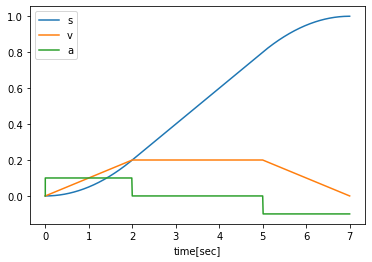

In [21]:
# 속도와 가속도의 최대값을 파라미터로 주고 궤적찾기
time, traj = Trapezoidal_Traj_Gen_Given_Vmax_and_Amax(0.2, 0.1, 0.01)
plt.plot(time, traj)
plt.legend(['s','v','a'])
plt.xlabel('time[sec]')
plt.show()

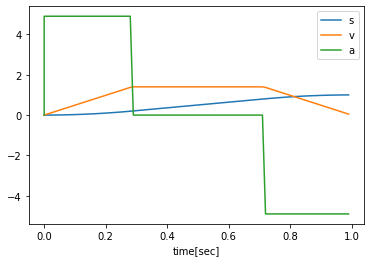

In [22]:
# 속도 최대값과 목표시간을 파라미터로 주고 궤적찾기
time, traj = Trapezoidal_Traj_Gen_Given_Vmax_and_T(1.4, 1, 0.01)
plt.plot(time, traj)
plt.legend(['s','v','a'])
plt.xlabel('time[sec]')
plt.show()

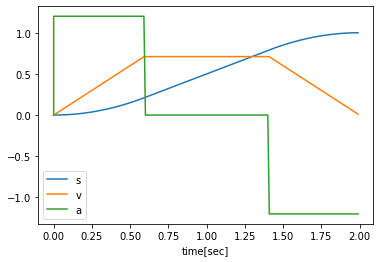

In [23]:
# 기속도 최대값과 목표시간을 파라미터로 주고 궤적찾기
time, traj = Trapezoidal_Traj_Gen_Given_Amax_and_T(1.2, 2, 0.01)
plt.plot(time, traj)
plt.legend(['s','v','a'])
plt.xlabel('time[sec]')
plt.show()

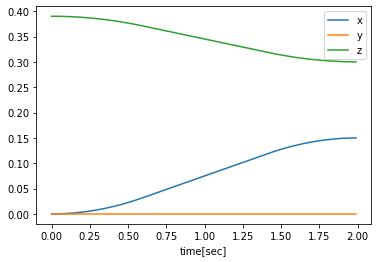

In [24]:
# 목표점이 x = 0.15, y=0, z=0.3 일때
# Cartesian 좌표계 상에서의 trajectory 값을 찾아보자. 
# 가속도는 1.5 m/s2, 시간은 2초일때
time, traj = Trapezoidal_Traj_Gen_Given_Amax_and_T(1.2, 2, 0.01)
x_traj = Path_Gen(0,0.15,traj[:,0])
y_traj = Path_Gen(0,0.,traj[:,0])
z_traj = Path_Gen(0.39,0.3,traj[:,0])
plt.plot(time, x_traj, time, y_traj, time, z_traj)
plt.legend(['x','y','z'])
plt.xlabel('time[sec]')
plt.show()

In [25]:
# 위의 x, y, z 값에 따른 joint space 각도값을 역기구학으로 풀자
# 임의의 radian 결과값을 -pi에서 pi범위의 값으로 변환
def convert_radian_from_npi_to_pi(rad):
    ang = rad
    while math.fabs(ang) >= (np.pi):
        if ang>0:
            ang-=(numpy.pi*2)
        else:
            ang+=(numpy.pi*2)
    return ang

# 수치적 역기구학 푸는 함수
def numerical_IK(x_des,th_now):
    epsilon = 1e-10
    
    i = 0
    theta = th_now
    err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])

    while (numpy.linalg.norm(err) > epsilon):
        J_now = func_J(theta[0], theta[1], theta[2], theta[3])
        J_inv = np.linalg.inv((J_now.transpose() @ J_now)) @ J_now.transpose()
        theta = theta + J_inv @ err
        for j in range(len(theta)):
            theta[j] = convert_radian_from_npi_to_pi(theta[j])
        err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])
        i += 1
        
    return theta

In [26]:
# 수치적으로 
theta = numpy.array([0.001,0.001,0.001,0.001])
for index in range(len(time)):
    x_des = numpy.array([x_traj[index], y_traj[index], z_traj[index]])
    theta = numerical_IK(x_des,theta)
    if index == 0:
        theta_store = theta
    else:
        theta_store = numpy.vstack([theta_store, theta])

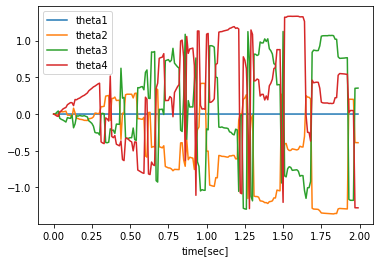

In [27]:
plt.plot(time, theta_store[:,0], time, theta_store[:,1], time, theta_store[:,2], time, theta_store[:,3])
plt.legend(['theta1','theta2','theta3', 'theta4'])
plt.xlabel('time[sec]')
plt.show()

In [28]:
theta_traj = numpy.degrees(theta_store)

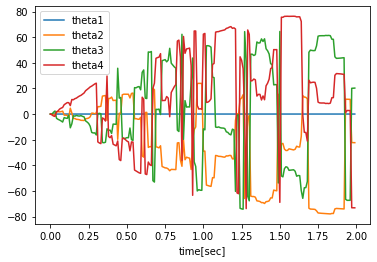

In [29]:
plt.plot(time, theta_traj[:,0], time, theta_traj[:,1], time, theta_traj[:,2], time, theta_traj[:,3])
plt.legend(['theta1','theta2','theta3', 'theta4'])
plt.xlabel('time[sec]')
plt.show()